In [3]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import glob

for ds in ['train','test']:
    for dogs_cats in ['dogs','cats']:
        data_dir=f'/kaggle/input/dogs-vs-cats/{ds}/{dogs_cats}/*'
        image_count = len(glob.glob(data_dir))
        print(f"No. of images of {dogs_cats} in {ds} folder: {image_count}")

No. of images of dogs in train folder: 10000
No. of images of cats in train folder: 10000
No. of images of dogs in test folder: 2500
No. of images of cats in test folder: 2500


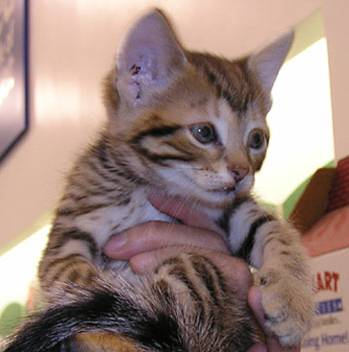

In [2]:
import PIL
data_dir='/kaggle/input/dogs-vs-cats/train/cats/*.jpg'
imgs = glob.glob(data_dir)
PIL.Image.open(str(imgs[0]))

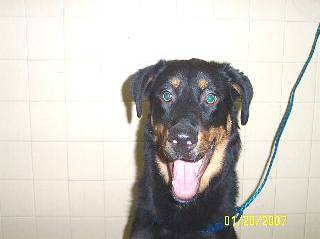

In [3]:
data_dir='/kaggle/input/dogs-vs-cats/train/dogs/*.jpg'
imgs = glob.glob(data_dir)
PIL.Image.open(str(imgs[0]))

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    directory='/kaggle/input/dogs-vs-cats/train/',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    verbose=True
)
test_ds=tf.keras.preprocessing.image_dataset_from_directory(
    directory='/kaggle/input/dogs-vs-cats/test/',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    verbose=True
)

Found 20000 files belonging to 2 classes.


I0000 00:00:1754845060.775044      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Found 5000 files belonging to 2 classes.


## ****Normalization****

In [4]:
for images, labels in train_ds.take(1):
    print("x (images) shape:", images.shape)
    print("x (images) dtype:", images.dtype)
    print("First image pixel [0,0]:", images[0][0][0])

for images, labels in train_ds.take(1):
    print("Pixel range:", tf.reduce_min(images).numpy(), "to", tf.reduce_max(images).numpy())

x (images) shape: (32, 256, 256, 3)
x (images) dtype: <dtype: 'float32'>
First image pixel [0,0]: tf.Tensor([223. 228. 232.], shape=(3,), dtype=float32)
Pixel range: 0.0 to 255.0


In [5]:
# normalizing data
# x=image, y=label
train_ds = train_ds.map(lambda x, y: (x / 255.0, y)) 
test_ds = test_ds.map(lambda x, y: (x / 255.0, y))

In [6]:
# after normalizing dataset (now the pixels are in range 0-1)
for images, labels in train_ds.take(1):
    print("x (images) shape:", images.shape)
    print("x (images) dtype:", images.dtype)
    print("First image pixel [0,0]:", images[0][0][0])

for images, labels in train_ds.take(1):
    print("Pixel range:", tf.reduce_min(images).numpy(), "to", tf.reduce_max(images).numpy())

x (images) shape: (32, 256, 256, 3)
x (images) dtype: <dtype: 'float32'>
First image pixel [0,0]: tf.Tensor([0.49803922 0.42745098 0.12941177], shape=(3,), dtype=float32)
Pixel range: 0.0 to 1.0


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout


In [8]:
model=Sequential()
model.add(Conv2D(
    32,
    kernel_size=(3,3),
    padding='valid',
    activation='relu',
    input_shape=(256,256,3)

))
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=2,padding='valid'

))
model.add(Dropout(0.25))  


model.add(Conv2D(
    64,
    kernel_size=(3,3),
    padding='valid',
    activation='relu',

))
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=2,padding='valid'

))
model.add(Dropout(0.25))  

model.add(Conv2D(
    128,
    kernel_size=(3,3),
    padding='valid',
    activation='relu',

))
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=2,padding='valid'

))
model.add(Dropout(0.25))  

model.add(Conv2D(
    256,
    kernel_size=(3,3),
    padding='valid',
    activation='relu',

))
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=2,padding='valid'

))
model.add(Dropout(0.25))  

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))  
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(
    optimizer='adam',                    # optimizer
    loss='binary_crossentropy',           # loss function for binary classification
    metrics=['accuracy']                  # track accuracy
)

In [10]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)

Epoch 1/10


I0000 00:00:1754845111.190889     104 service.cc:148] XLA service 0x79dff000f760 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754845111.191704     104 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1754845112.014275     104 cuda_dnn.cc:529] Loaded cuDNN version 90300


  3/625 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.6285 - loss: 1.3288   

I0000 00:00:1754845119.959761     104 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 67ms/step - accuracy: 0.5132 - loss: 0.7172 - val_accuracy: 0.5012 - val_loss: 0.6893
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.5658 - loss: 0.6796 - val_accuracy: 0.5976 - val_loss: 0.6692
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.6110 - loss: 0.6546 - val_accuracy: 0.6864 - val_loss: 0.5794
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.6794 - loss: 0.5875 - val_accuracy: 0.7366 - val_loss: 0.5317
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.7513 - loss: 0.5119 - val_accuracy: 0.7736 - val_loss: 0.4754
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.7910 - loss: 0.4443 - val_accuracy: 0.7630 - val_loss: 0.4869
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.8163 - loss: 0.4009 - val_accuracy: 0.7900 - val_loss: 0.4543
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.8436 - loss: 0.3552 - val_accurac

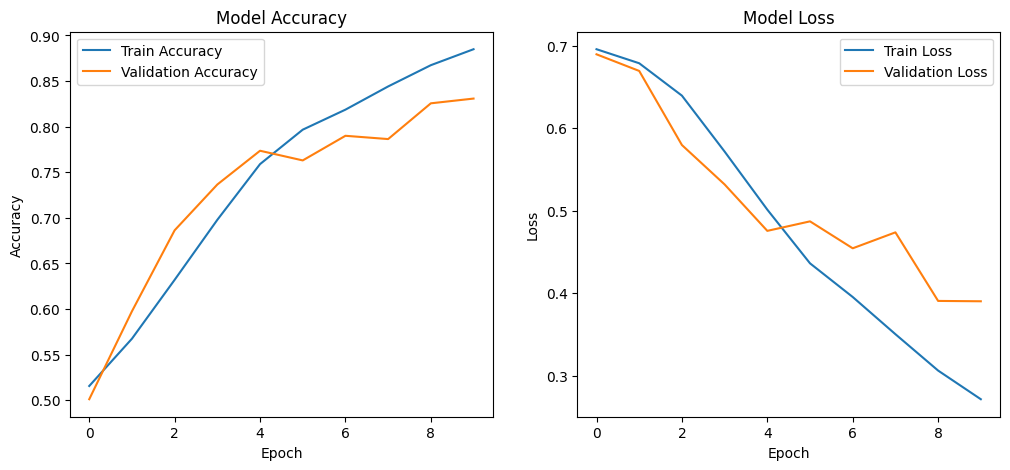

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [13]:
import numpy as np

# Path to the image you want to test
img_path = "/kaggle/input/dogs-vs-cats/test/dogs/dog.10021.jpg"  

# Load and preprocess
img = tf.keras.utils.load_img(img_path, target_size=(256, 256))
img_array = tf.keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # shape: (1, 256, 256, 3)
img_array = img_array / 255.0  # normalize same as training
prediction = model.predict(img_array)
print(prediction)
# Since sigmoid output: < 0.5 = cat, >= 0.5 = dog
if prediction[0][0] < 0.5:
    print(f"Prediction: Cat ({(1 - prediction[0][0]) * 100:.2f}% confidence)")
else:
    print(f"Prediction: Dog ({prediction[0][0] * 100:.2f}% confidence)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step
[[0.9162457]]
Prediction: Dog (91.62% confidence)


In [14]:
# import cv2

# test_img=cv2.imread("/kaggle/input/dogs-vs-cats/test/dogs/dog.10021.jpg")
# plt.imshow(test_img)

In [15]:
# test_img=cv2.resize(test_img,(256,256))
# test_input=test_img.reshape((1,256,256,3))
# model.predict(test_input)